# Предсказание оценки за 2 коллоквиум

Для начала стоит оговориться, что модель не идеальна и может дать лишь примерный прогноз
Будем решать задачу классификации: предсказываем оценку по 5-ти балльной шкале. Можно было перейти, например, к 10-ти бальной, тогда можно было бы интерпретировать различные "2+", "5-----", либо решать задачу регрессии. Но в обоих случаях, качество прогноза бы заметно ухудшилось (пробывал регрессию: в лучшем случае предсказательная сила была около 53%). Прежде всего это потому что мало данных. Если отбросить людей, у которых неизвестны оценки за коллок (они не ходили), то получится всего 45 наблюдения, что крайне мало для хорошей машин лернинг модели

Импортируем необходимые пакеты

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from IPython.display import display

## Подгружаем Excel файл

In [2]:
col_name = ['Номер','ФИО','летучка 1','летучка 2','летучка 3','коллок 1']
df_kolok = pd.read_excel('C:/Users/yurai/Downloads/anch-21-22.xlsx').iloc[:,[0,1,2,3,9,8]]
df_kolok.columns = col_name
df_kolok.head(40)
# df_kolok.shape

,Номер,ФИО,летучка 1,летучка 2,летучка 3,коллок 1
0,1.0,Абаджян Наира Кареновна,0.7,0.7,0.6,NaN
1,2.0,Алексанян Яна Кареновна,0.1,NaN,0.5,NaN
2,3.0,Алипов Станислв Александрович,0.0,0.2,NaN,NaN
3,4.0,Безрукова Анастасия Васильевна,0.3,0.1,0.1,NaN
4,5.0,Богданова Мария Алексеевна,1.0,0.8,0.6,5.0
5,6.0,Будников Константин Александрович,NaN,NaN,NaN,NaN
6,7.0,Волков Дмитрий Сергеевич,1.2,0.8,0.6,2(5)
7,8.0,Воронина Анна Александровна,0.5,0.1,0.6,NaN
8,9.0,Дмитрюкова Дарья Андреевна,0.0,0.7,1.0,4.0
9,10.0,Дорофеев Денис Богданович,2.0,0.4,0.5,2.0


#### Так как у нас есть не только числа, но и различные строки, их нужно заменить на числа

In [3]:
df_kolok['коллок 1'].value_counts()

5.0       16
2.0       13
4.0        6
5-         3
3.0        2
2(5)       1
5-----     1
2+         1
2(4-)      1
5--        1
5----      1
Name: коллок 1, dtype: int64

In [4]:
# change_dict = {'5-':4.9,'5--':4.8,'5----':4.6,'5-----':4.5,'2(5)':5,'2(4-)':3.9,'2+':2.1}
change_dict = {'5-':5,'5--':5,'5----':5,'5-----':5,'2(5)':5,'2(4-)':4,'2+':2}
df_kolok['коллок 1'] = df_kolok['коллок 1'].replace(change_dict)
# df_kolok['коллок 1'] = df_kolok['коллок 1'].apply(lambda x: x if math.isnan(x) else int(x))
df_kolok['коллок 1'].value_counts()

5.0    23
2.0    14
4.0     7
3.0     2
Name: коллок 1, dtype: int64

#### Так как признаков и так немного, можно добавить несколько от себя. Например, почему бы не добавить каждому человеку его номер группы? 

In [5]:
df_kolok[df_kolok['ФИО'].str.contains("группа ")==True]

,Номер,ФИО,летучка 1,летучка 2,летучка 3,коллок 1
30,NaN,группа (m=102) Э-21-102,NaN,NaN,NaN,NaN
61,NaN,группа (m=103) Ц-19-101,NaN,NaN,NaN,NaN
91,NaN,группа (m=104) Ц-19-102,NaN,NaN,NaN,NaN


In [6]:
group_pos = np.where(df_kolok['ФИО'].str.contains("группа")==True)[0]
group_pos

array([30, 61, 91], dtype=int64)

In [7]:
group_list = [1 for x in range(31)] + [2 for x in range(31,62)] + [3 for x in range(62,92)] + [4 for x in range(92,120)]
df_kolok['Группа'] = group_list
df_kolok = df_kolok.drop(group_pos)
df_kolok

,Номер,ФИО,летучка 1,летучка 2,летучка 3,коллок 1,Группа
0,1.0,Абаджян Наира Кареновна,0.7,0.7,0.6,NaN,1
1,2.0,Алексанян Яна Кареновна,0.1,NaN,0.5,NaN,1
2,3.0,Алипов Станислв Александрович,0.0,0.2,NaN,NaN,1
3,4.0,Безрукова Анастасия Васильевна,0.3,0.1,0.1,NaN,1
4,5.0,Богданова Мария Алексеевна,1.0,0.8,0.6,5.0,1
...,...,...,...,...,...,...,...
115,24.0,Фень Александр Сергеевич,0.5,0.4,NaN,4.0,4
116,25.0,Цеденов Мерген Иванович,1.5,NaN,1.1,5.0,4
117,26.0,Шиманская Мария Валерьевна,0.5,0.1,0.3,2.0,4
118,27.0,Широков Илья Михайлович,0.5,NaN,0.5,NaN,4


#### В идеале, наверное, было бы добавить ещё признаков, например, на бюджете студент или на платке. Но это достаточно запарно, поэтому оставил данную идею

#### Теперь, собственно, перейдем к решению поставленной задачи обучения с учителем (supervised learning): дана  выборка с известными ответами, необходимо обучить модель на тренировочной подвыборке и затем проверить её работоспособность на тестовой подвыборке.

In [8]:
df_kolok = df_kolok.drop(np.where(df_kolok['ФИО'].isna())[0]).reset_index(drop=True).iloc[:,[1,6,2,3,4,5]]
df_kolok

,ФИО,Группа,летучка 1,летучка 2,летучка 3,коллок 1
0,Абаджян Наира Кареновна,1,0.7,0.7,0.6,NaN
1,Алексанян Яна Кареновна,1,0.1,NaN,0.5,NaN
2,Алипов Станислв Александрович,1,0.0,0.2,NaN,NaN
3,Безрукова Анастасия Васильевна,1,0.3,0.1,0.1,NaN
4,Богданова Мария Алексеевна,1,1.0,0.8,0.6,5.0
...,...,...,...,...,...,...
107,Фень Александр Сергеевич,4,0.5,0.4,NaN,4.0
108,Цеденов Мерген Иванович,4,1.5,NaN,1.1,5.0
109,Шиманская Мария Валерьевна,4,0.5,0.1,0.3,2.0
110,Широков Илья Михайлович,4,0.5,NaN,0.5,NaN


In [9]:
drop_list = np.where(df_kolok['коллок 1'].isnull())
df_kolok_sup = df_kolok.drop(drop_list[0])
display(df_kolok_sup.shape)
df_kolok_sup

(45, 6)

,ФИО,Группа,летучка 1,летучка 2,летучка 3,коллок 1
4,Богданова Мария Алексеевна,1,1.0,0.8,0.6,5.0
6,Волков Дмитрий Сергеевич,1,1.2,0.8,0.6,5.0
8,Дмитрюкова Дарья Андреевна,1,0.0,0.7,1.0,4.0
9,Дорофеев Денис Богданович,1,2.0,0.4,0.5,2.0
10,Жильцов Дмитрий Александрович,1,0.5,0.4,0.7,5.0
12,Зарманбетова Алсу курманалиевна,1,0.1,0.2,NaN,2.0
15,Конзафаров Илья Андреевич,1,0.6,0.3,0.7,5.0
21,Недорезова Ульяна Юрьевна,1,1.0,1.4,1.1,5.0
22,Садовникова Анастасия Дмитриевна,1,0.5,0.7,1.1,5.0
26,Ходжаев Валерий Манучехрович,1,1.0,0.4,0.8,5.0


#### Пропущенные значения заполним средним баллом за остальные летучки (по каждому человеку индивидуально за его баллы, а не средний балл за эту летучку среди всех!)

In [10]:
df_kolok_sup.iloc[:,[2,3,4]] = df_kolok_sup.iloc[:,[2,3,4]].apply(lambda row: row.fillna(row.mean()), axis=1)
df_kolok_sup.replace()

,ФИО,Группа,летучка 1,летучка 2,летучка 3,коллок 1
4,Богданова Мария Алексеевна,1,1.0,0.80,0.60,5.0
6,Волков Дмитрий Сергеевич,1,1.2,0.80,0.60,5.0
8,Дмитрюкова Дарья Андреевна,1,0.0,0.70,1.00,4.0
9,Дорофеев Денис Богданович,1,2.0,0.40,0.50,2.0
10,Жильцов Дмитрий Александрович,1,0.5,0.40,0.70,5.0
12,Зарманбетова Алсу курманалиевна,1,0.1,0.20,0.15,2.0
15,Конзафаров Илья Андреевич,1,0.6,0.30,0.70,5.0
21,Недорезова Ульяна Юрьевна,1,1.0,1.40,1.10,5.0
22,Садовникова Анастасия Дмитриевна,1,0.5,0.70,1.10,5.0
26,Ходжаев Валерий Манучехрович,1,1.0,0.40,0.80,5.0


#### Посмотрим корреляцию признаков между собой. Можно заметить, что существует положительная корреляция между летучками (причем чем позже летучка, тем больше она коррелирует) и отрицательная с номером группы (это означает, что у первой группы есть небольшое преимущество)

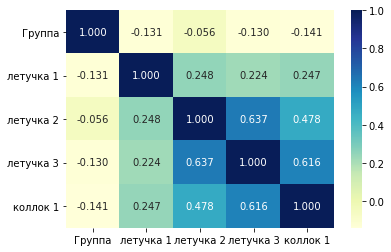

In [11]:
sns.heatmap(df_kolok_sup.corr(),annot=True, fmt='.3f', cmap='YlGnBu');

#### Импортирует модели для машинного обучения из библиотеки sklearn

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = df_kolok_sup.iloc[:,1:-1]
y = df_kolok_sup['коллок 1']
X.head(3)

,Группа,летучка 1,летучка 2,летучка 3
4,1,1.0,0.8,0.6
6,1,1.2,0.8,0.6
8,1,0.0,0.7,1.0


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,train_size=0.75,random_state=42,shuffle=True)
knk = KNeighborsClassifier()
knk.fit(X_train,y_train)
knk.score(X_test,y_test)

0.25

In [15]:
display(np.unique(y_train),np.unique(y_test))

array([2., 3., 4., 5.])

array([2., 4., 5.])

In [16]:
knk = KNeighborsClassifier()

pipe = Pipeline([('preprocessing', RobustScaler()),
                  ('classifier', knk)])

n_neighbors = [1, 2, 4, 8, 10, 12, 14, 16, 18, 25, 40, 45]
p = [1, 2, 3, 4, 6, 7, 8, 10, 12]
weights = ['uniform', 'distance']

kfold = ShuffleSplit(random_state=42)

param_grid = [
    {
        "preprocessing":[MinMaxScaler(), RobustScaler(), StandardScaler(), Normalizer()],
        "classifier":[knk],
        "classifier__n_neighbors": n_neighbors,
        "classifier__p":p,
        "classifier__weights":weights        
    }
]

grid = GridSearchCV(pipe, param_grid, n_jobs=-1, 
                    cv=kfold, return_train_score=True)
grid.fit(X_train, y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier': KNeighborsClassifier(n_neighbors=12, p=8, weights='distance'), 'classifier__n_neighbors': 12, 'classifier__p': 8, 'classifier__weights': 'distance', 'preprocessing': RobustScaler()}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.775000

Точность для наилучшей модели на тестовом наборе: 0.666667



C:\Users\yurai\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.4   0.425 0.425 0.6   0.4   0.425 0.425 0.6   0.475 0.475 0.425 0.575
 0.475 0.475 0.425 0.575 0.475 0.475 0.45  0.575 0.475 0.475 0.45  0.575
 0.5   0.5   0.45  0.575 0.5   0.5   0.45  0.575 0.5   0.5   0.45  0.575
 0.5   0.5   0.45  0.575 0.5   0.5   0.45  0.6   0.5   0.5   0.45  0.6
 0.5   0.5   0.45  0.6   0.5   0.5   0.45  0.6   0.525 0.5   0.45  0.6
 0.525 0.5   0.45  0.6   0.525 0.5   0.45  0.625 0.525 0.5   0.45  0.625
 0.325 0.35  0.375 0.5   0.4   0.425 0.425 0.6   0.325 0.375 0.375 0.425
 0.475 0.475 0.425 0.575 0.35  0.375 0.375 0.475 0.475 0.475 0.45  0.575
 0.35  0.375 0.375 0.475 0.5   0.5   0.45  0.575 0.35  0.375 0.35  0.475
 0.5   0.5   0.45  0.575 0.35  0.375 0.35  0.475 0.5   0.5   0.45  0.6
 0.35  0.375 0.35  0.45  0.5   0.5   0.45  0.6   0.35  0.375 0.35  0.45
 0.525 0.5   0.45  0.6   0.35  0.375 0.35  

In [17]:
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)
gbrt.score(X_test,y_test)

0.75

In [18]:
import xgboost
from sklearn import datasets  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score

# X, y = datasets.make_classification(n_samples=10000, n_features=20,  
#                                     n_informative=2, n_redundant=10,
#                                     random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  
                                                    random_state=42)

from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

xclas = XGBClassifier()  # and for classifier  
xclas.fit(X_train, y_train)  
y_predict = xclas.predict(X_test)  


print(cross_val_score(xclas, X_train, y_train)  )

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yurai\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as in

[00:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [19]:
xclas.score(X_test,y_test)

0.7857142857142857

#### Получили точность около 78,5%, что достаточно недурно с таким небольшим набором данных. Accuracy - метрика, которая показывает точность нашего прогноза в целом

In [20]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix
print(classification_report(y_test, y_predict,zero_division=0))

              precision    recall  f1-score   support

         2.0       1.00      0.80      0.89         5
         4.0       0.00      0.00      0.00         2
         5.0       0.70      1.00      0.82         7

    accuracy                           0.79        14
   macro avg       0.57      0.60      0.57        14
weighted avg       0.71      0.79      0.73        14



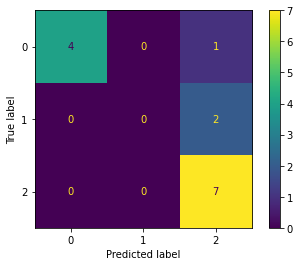

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict)).plot();

### Теперь сделаем предсказание оценки для всех!

In [22]:
X = df_kolok.iloc[:,1:-1]
final_predict = xclas.predict(X)
# X

In [23]:
df_kolok['коллок 2'] = final_predict
df_kolok

,ФИО,Группа,летучка 1,летучка 2,летучка 3,коллок 1,коллок 2
0,Абаджян Наира Кареновна,1,0.7,0.7,0.6,NaN,5.0
1,Алексанян Яна Кареновна,1,0.1,NaN,0.5,NaN,2.0
2,Алипов Станислв Александрович,1,0.0,0.2,NaN,NaN,2.0
3,Безрукова Анастасия Васильевна,1,0.3,0.1,0.1,NaN,2.0
4,Богданова Мария Алексеевна,1,1.0,0.8,0.6,5.0,5.0
...,...,...,...,...,...,...,...
107,Фень Александр Сергеевич,4,0.5,0.4,NaN,4.0,2.0
108,Цеденов Мерген Иванович,4,1.5,NaN,1.1,5.0,5.0
109,Шиманская Мария Валерьевна,4,0.5,0.1,0.3,2.0,2.0
110,Широков Илья Михайлович,4,0.5,NaN,0.5,NaN,2.0


#### Выгрузим файлик

In [24]:
# df_kolok.to_excel('anch-21-22_predict.xlsx')